<hr>

<center><font size="6">
<a href="https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893/">Udacity Deep Reinforcement Learning Nanodegree Program</a></font></center>
<br>
<p></p>
<center><font size="6">Project: Continuous Control</font></center>
<p></p>
<br>
<center><font size="3">
<a href="https://gh.linkedin.com/in/christian-motschenbacher-7a660b123/">Christian Motschenbacher</a></font></center>
<br>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<a href="https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893"><img src = "./media/UdacityDRL01.png" width = 950, align = "center"></a>
</div>

<hr>

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Author, Project and Environment description </a></li>
<li><a href="#ref1">Libraries </a></li>
<li><a href="#ref2">Start the Environment </a></li>
<li><a href="#ref3">Examine the State and Action Spaces </a></li>
<li><a href="#ref4">Create intelligent Agents </a></li>
<li><a href="#ref5">Watching/testing an untrained agent and plot the reward scores </a></li>
<li><a href="#ref6">Training the Agent with DDPG </a></li>
<li><a href="#ref7">Plotting the training reward scores </a></li>
<li><a href="#ref8">Watching/testing an trained agent and plot the reward scores </a></li>
<li><a href="#ref9">Close Environment </a></li>
</div>

<hr>

# Author, Project and Environment description
## Author  
  
**Name: [Christian Motschenbacher](https://gh.linkedin.com/in/christian-motschenbacher-7a660b123)**  
  
**Date: 02/2019**  
  
**Project: Udacity Deep Reinforcement Learning Nanodegree Program: Project 2: Continuous Control**  
**This file contains the training and testing code for this project.**


## Project and Environment description

<div style="text-align: justify">  
The task of this project was to train 20 agents, who moves a double-jointed arm to target location and keeps the agent's hand in the goal location. The following video is showing how a trained agent is performing this task well.
</div>

![](./media/UdacityDRL02.gif)
<br>
<div style="text-align: justify">  
A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.
</div>
<br>
<div style="text-align: justify">  
The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.
</div>
<br>
<div style="text-align: justify">  
The task is episodic and in order to solve the environment, the agent must achieve an average score of +30 over 100 consecutive episodes.
</div>
<br>
<div style="text-align: justify">  
For the soution of this task it has been used the Unity ML-Agents Reacher Environment from Unity-Technologies, the Python programming language as well the libraries NumPy, PyTorch and others.</p>
</div>

<hr>

# Libraries
Importing the necessary libraries for this project.

In [1]:
from unityagents import UnityEnvironment

import numpy as np
from time import sleep, time
from pandas import Series

import torch
from collections import deque
import matplotlib.pyplot as plt
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

<hr>

# Start the Environment
<div style="text-align: justify">  
The next code section opens and starts the Unity Environment. In addition, the environment return its properties such as the amount of possible actions, the state spaces and others.
</div>

In [2]:
# The project has been developed in Windows and therefore, the Windows Unity-Technology environment has been used.
# The training can be performed with and without graphics by setting the parameter "no_graphics=False" 
# respectiveley "no_graphics=True".

# Windows
env = UnityEnvironment(file_name='./env/Reacher_Windows_x86_64_20_Agents/Reacher.exe',
                       no_graphics=True)
# Linux
#env = UnityEnvironment(file_name='./env/Reacher_Linux_20_Agents/Reacher.x86_64',
#                       no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


<div style="text-align: justify">  
Environments contain <b>brains</b> which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.
</div>

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name) # print brain name
print(brain)      # print the properties of the brain

ReacherBrain
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


<hr>

# Examine the State and Action Spaces
<br>
<div style="text-align: justify">  
In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.  
</div>
<br>  
<div style="text-align: justify">  
The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector must be a number between -1 and 1.  
</div>
<br>
<div style="text-align: justify">  
The code cell below print some information about the environment.  
</div>

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


<hr>

# Create an intelligent Agent for the following testing, training and testing code section.

In [5]:
from ddpg_agent import Agent   # import the necessary library with the class agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=3) # create and instance with initial parameters of the agent

<hr>

# Watch/testing an untrained agent and plot the reward score


**Example Video of untrained agent.**  
After the following code cell is executed the vido can be started via the play button.

In [6]:
HTML("""<div align="middle"><video width="80%" height="" controls><source src="media/01_p2_r_untrained.mp4" type="video/mp4"></video></div>""")

<div style="text-align: justify">
Once the following testing of an untrained agent code cell is executed, a window will pop up you will watch the agent's untrained performance controlled by random actions at each time step. 
</div>

Score of 20 trained agents: [0.1374999969266355, 0.17949999598786234, 0.21349999522790314, 0.16449999632313847, 0.08499999810010195]


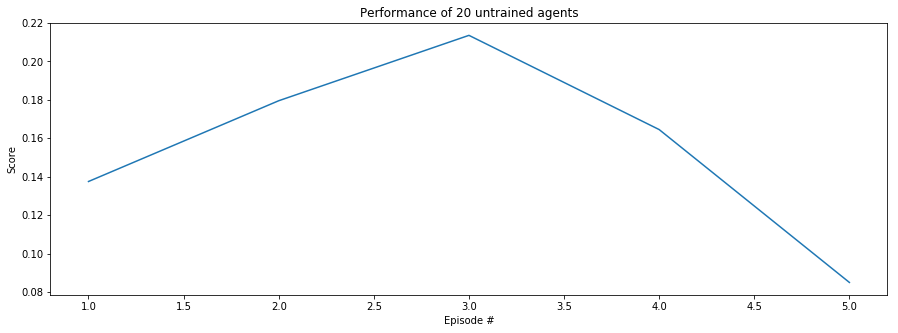

In [7]:
episode_score = []                                        # list containing scores from each episode

for j in range(5):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    for t in range(1000):
         #sleep(0.1)                                       # for debugging and video recording
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
            
    episode_score.append(np.mean(scores))

# Plot and print the achived scores during this episode
print("Score of 20 trained agents: {}".format(episode_score))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
plt.plot(1+np.arange(len(episode_score)),episode_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Performance of 20 untrained agents')
plt.show()

<hr>

# Train the Agent/Model with DDPG

**Example Video of an agent while training.**  
After the following code cell is executed the vido can be started via the play button.

In [8]:
HTML("""<div align="middle"><video width="80%" height="" controls><source src="media/02_p2_r_training.mp4" type="video/mp4"></video></div>""")

<div style="text-align: justify">
The training code cell below train the agent from scratch and output the agent's performance continuously. The used parameters have been found by systematically empirical analysis. Once the agent exceeds the score +30, which is defined that the environment and task is solved the program save the model weights of the trained agent in the folder "./model_weights/" and returns the score for the subsequent plot.
</div>

In [9]:
# training code cell
def ddpg(n_episodes=200, max_t=1000):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    agent_score   = np.zeros(num_agents) # initialize the score (for each agent)
    episode_score = []                   # list containing scores from each episode
    scores_window = deque(maxlen=100)    # last 100 scores
    episode_scores_window_mean = []      # list containing mean scores over the last 100 episodes in the scores window
    i_episode_solved = 0                 # episodes solved environment
    scores_window_solved = scores_window # last 100 scores
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment and set in training mode
        agent.reset()
        state = env_info.vector_observations    # get the next state
        agent_score   = np.zeros(num_agents)    # set score (for each agent)
        episode_start_time = time()             # episode duration start
        
        for t in range(max_t):
            #sleep(0.1)                                 # for debugging and video recording
            action = [agent.act(np.expand_dims(state[i],axis=0)) for i in range(20)] # get action from 20 agents
            
            env_info = env.step(action)[brain_name]     # send the action to the environment
            next_state = env_info.vector_observations   # get the next state
            reward = env_info.rewards                   # get the reward
            done = env_info.local_done                  # see if episode has finished

            [agent.save_experience(state, action, reward, next_state, done) for i, (state, action, reward, next_state, done) in enumerate(zip(state, action, reward, next_state, done))] # store experience in memory
            agent.step() # perform learning

            state = next_state    # copy next state as current state
            agent_score += reward # sum rewards score into agents score

            if np.any(done): # check if episode is done
                break 

        # calculate the statistics for agents performance
        episode_duration = time() - episode_start_time
        
        agent_score_min  = np.min(agent_score)
        agent_score_mean = np.mean(agent_score)
        agent_score_max  = np.max(agent_score)
        
        scores_window.append(agent_score_mean)
        episode_score.append(agent_score_mean)
        
        scores_window_mean = np.mean(scores_window)
        
        episode_scores_window_mean.append(scores_window_mean)
        
        if i_episode % 1 == 0:
            # Ep.          = Episode number
            # Ep.T.A.Score = Episode total average score
            # Ep.Mean.S.   = Episode mean score
            # Ep.Min.S.    = Episode minimum score
            # Ep.Max.S.    = Episode maximum score
            # Ep.Du.Sec.   = Episode duration in seconds
            print('\nEp.: {:3.0f}   Ep.T.A.Score: {:5.2f}\tEp.Mean.S.: {:5.2f}\tEp.Min.S.: {:5.2f}\tEp.Max.S.: {:5.2f}\tEp.Du.Sec.: {:.2f}'
                  .format(i_episode,scores_window_mean,agent_score_mean,agent_score_min,agent_score_max,episode_duration), end="")
        if scores_window_mean>= 30 and i_episode_solved == 0: # check if the score for solving the environment has been exceeded
                i_episode_solved     = i_episode
                scores_window_solved = scores_window_mean
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode_solved, scores_window_solved))
                torch.save(agent.actor_local.state_dict(), './model_weights/agent_actor_local_checkpoint_solved.pth') # save actor weights after environment has been solved
                torch.save(agent.critic_local.state_dict(), './model_weights/agent_critic_local_checkpoint_solved.pth') # save critic weights after environment has been solved
        
    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode_solved, scores_window_solved))
    torch.save(agent.actor_local.state_dict(), './model_weights/agent_actor_local_checkpoint_training_finished.pth') # save actor weights after defined steps
    torch.save(agent.critic_local.state_dict(), './model_weights/agent_critic_local_checkpoint_training_finished.pth') # save critic weights after defined steps

    return (episode_score, episode_scores_window_mean)

episode_score, episode_scores_window_mean = ddpg()


Ep.:   1   Ep.T.A.Score:  1.03	Ep.Mean.S.:  1.03	Ep.Min.S.:  0.19	Ep.Max.S.:  2.68	Ep.Du.Sec.: 24.06
Ep.:   2   Ep.T.A.Score:  0.83	Ep.Mean.S.:  0.63	Ep.Min.S.:  0.02	Ep.Max.S.:  1.83	Ep.Du.Sec.: 23.41
Ep.:   3   Ep.T.A.Score:  0.81	Ep.Mean.S.:  0.77	Ep.Min.S.:  0.18	Ep.Max.S.:  1.95	Ep.Du.Sec.: 23.54
Ep.:   4   Ep.T.A.Score:  0.78	Ep.Mean.S.:  0.67	Ep.Min.S.:  0.00	Ep.Max.S.:  1.76	Ep.Du.Sec.: 23.55
Ep.:   5   Ep.T.A.Score:  0.77	Ep.Mean.S.:  0.75	Ep.Min.S.:  0.17	Ep.Max.S.:  1.68	Ep.Du.Sec.: 23.75
Ep.:   6   Ep.T.A.Score:  0.79	Ep.Mean.S.:  0.87	Ep.Min.S.:  0.00	Ep.Max.S.:  1.83	Ep.Du.Sec.: 24.74
Ep.:   7   Ep.T.A.Score:  0.76	Ep.Mean.S.:  0.57	Ep.Min.S.:  0.01	Ep.Max.S.:  1.89	Ep.Du.Sec.: 24.92
Ep.:   8   Ep.T.A.Score:  0.81	Ep.Mean.S.:  1.16	Ep.Min.S.:  0.28	Ep.Max.S.:  2.70	Ep.Du.Sec.: 24.84
Ep.:   9   Ep.T.A.Score:  0.88	Ep.Mean.S.:  1.47	Ep.Min.S.:  0.34	Ep.Max.S.:  3.93	Ep.Du.Sec.: 24.35
Ep.:  10   Ep.T.A.Score:  1.08	Ep.Mean.S.:  2.87	Ep.Min.S.:  0.12	Ep.Max.S.:  6.04	Ep.Du.S

Ep.:  81   Ep.T.A.Score: 32.29	Ep.Mean.S.: 38.70	Ep.Min.S.: 35.26	Ep.Max.S.: 39.58	Ep.Du.Sec.: 34.54
Ep.:  82   Ep.T.A.Score: 32.36	Ep.Mean.S.: 38.19	Ep.Min.S.: 34.25	Ep.Max.S.: 39.66	Ep.Du.Sec.: 34.47
Ep.:  83   Ep.T.A.Score: 32.43	Ep.Mean.S.: 38.15	Ep.Min.S.: 34.77	Ep.Max.S.: 39.44	Ep.Du.Sec.: 34.60
Ep.:  84   Ep.T.A.Score: 32.50	Ep.Mean.S.: 38.20	Ep.Min.S.: 34.34	Ep.Max.S.: 39.60	Ep.Du.Sec.: 34.42
Ep.:  85   Ep.T.A.Score: 32.56	Ep.Mean.S.: 38.11	Ep.Min.S.: 35.17	Ep.Max.S.: 39.60	Ep.Du.Sec.: 34.49
Ep.:  86   Ep.T.A.Score: 32.64	Ep.Mean.S.: 38.99	Ep.Min.S.: 37.68	Ep.Max.S.: 39.66	Ep.Du.Sec.: 34.46
Ep.:  87   Ep.T.A.Score: 32.71	Ep.Mean.S.: 38.43	Ep.Min.S.: 35.71	Ep.Max.S.: 39.67	Ep.Du.Sec.: 35.65
Ep.:  88   Ep.T.A.Score: 32.77	Ep.Mean.S.: 38.68	Ep.Min.S.: 36.39	Ep.Max.S.: 39.56	Ep.Du.Sec.: 34.73
Ep.:  89   Ep.T.A.Score: 32.84	Ep.Mean.S.: 38.53	Ep.Min.S.: 35.79	Ep.Max.S.: 39.66	Ep.Du.Sec.: 34.75
Ep.:  90   Ep.T.A.Score: 32.90	Ep.Mean.S.: 38.36	Ep.Min.S.: 36.49	Ep.Max.S.: 39.65	Ep.Du.Se

Ep.: 162   Ep.T.A.Score: 34.38	Ep.Mean.S.: 30.02	Ep.Min.S.: 22.19	Ep.Max.S.: 34.29	Ep.Du.Sec.: 34.15
Ep.: 163   Ep.T.A.Score: 34.30	Ep.Mean.S.: 30.71	Ep.Min.S.: 25.32	Ep.Max.S.: 35.69	Ep.Du.Sec.: 34.19
Ep.: 164   Ep.T.A.Score: 34.24	Ep.Mean.S.: 32.06	Ep.Min.S.: 23.51	Ep.Max.S.: 35.84	Ep.Du.Sec.: 33.97
Ep.: 165   Ep.T.A.Score: 34.16	Ep.Mean.S.: 31.13	Ep.Min.S.: 26.92	Ep.Max.S.: 34.81	Ep.Du.Sec.: 34.14
Ep.: 166   Ep.T.A.Score: 34.08	Ep.Mean.S.: 30.93	Ep.Min.S.: 21.63	Ep.Max.S.: 35.43	Ep.Du.Sec.: 34.03
Ep.: 167   Ep.T.A.Score: 34.01	Ep.Mean.S.: 29.90	Ep.Min.S.: 24.01	Ep.Max.S.: 33.52	Ep.Du.Sec.: 34.79
Ep.: 168   Ep.T.A.Score: 33.92	Ep.Mean.S.: 30.17	Ep.Min.S.: 22.95	Ep.Max.S.: 35.19	Ep.Du.Sec.: 34.19
Ep.: 169   Ep.T.A.Score: 33.83	Ep.Mean.S.: 30.17	Ep.Min.S.: 23.41	Ep.Max.S.: 35.85	Ep.Du.Sec.: 34.16
Ep.: 170   Ep.T.A.Score: 33.74	Ep.Mean.S.: 30.37	Ep.Min.S.: 24.26	Ep.Max.S.: 34.92	Ep.Du.Sec.: 34.22
Ep.: 171   Ep.T.A.Score: 33.64	Ep.Mean.S.: 29.93	Ep.Min.S.: 27.10	Ep.Max.S.: 32.27	Ep.Du.Se

<hr>

# Plotting the training reward scores
The following code cell plot the score of the trained agent in blue, as well the average score in red and the target score in green.

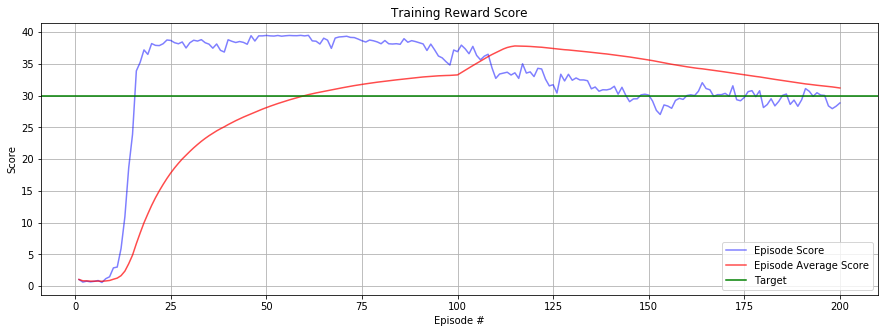

In [10]:
# prepare the plot and plot the score of the trained agent in blue, 
# as well the average score in red and the target score in green.
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
# plot the score of the trained agent in blue
plt.plot(1+np.arange(len(np.squeeze(episode_score))), np.squeeze(episode_score), color='b', alpha=0.5, label='Episode Score')
# plot the average score of the trained agent in red
plt.plot(1+np.arange(len(np.squeeze(episode_scores_window_mean))), episode_scores_window_mean, color='r', alpha=0.7, label='Episode Average Score')
# plot the target score in green
ax.axhline(y=30, xmin=0.0, xmax=1.0, color='g', label="Target")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Training Reward Score')
plt.grid(True)
plt.legend(loc=0)
plt.show()

<hr>

# Testing a trained agent and print the score as well plot the reward scores

**Example Video of trained agent.**  
After the following code cell is executed the vido can be started via the play button.

In [11]:
HTML("""<div align="middle"><video width="80%" height="" controls><source src="media/03_p2_r_trained.mp4" type="video/mp4"></video></div>""")

<div style="text-align: justify">
The following code cell test the trained agent in the environment.
The code loads the trained model weights from the folder "./model_weights/" into the agent model and the agents double-jointed arm move to target location and stays within the target location as good as possible until the end of the episode. Once the episodes has been finished the cell print the score of the episode and plot the associated reward score diagram.
</div>

In [12]:
# load the model weights from file
agent.actor_local.load_state_dict(torch.load('./model_weights/agent_actor_local_checkpoint_solved.pth'))
agent.critic_local.load_state_dict(torch.load('./model_weights/agent_critic_local_checkpoint_solved.pth'))

In [13]:
episode_score = []                                     # list containing scores from each episode

for j in range(5):                                     # specify the number of episodes
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state  = env_info.vector_observations              # get the current state
    score  = np.zeros(num_agents)                      # initialize the score

    for t in range(1000):
        #sleep(0.1)                                    # optional to reduce the speed of the agent
        action = [agent.act(np.expand_dims(state[i],axis=0)) for i in range(20)] # get action from 20 agents
        
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations      # get the next state
        reward = env_info.rewards                      # get the reward
        done = env_info.local_done                     # see if episode has finished
        
        score += reward                                # update the score
        
        state = next_state                             # roll over the state to next time step
        if np.any(done):                               # exit loop if episode finished
            break             
    episode_score.append(np.mean(score))               # collect the score

Score of 20 trained agents: [39.435999118536714, 39.31399912126362, 39.491499117296186, 39.48849911736325, 39.49549911720678]


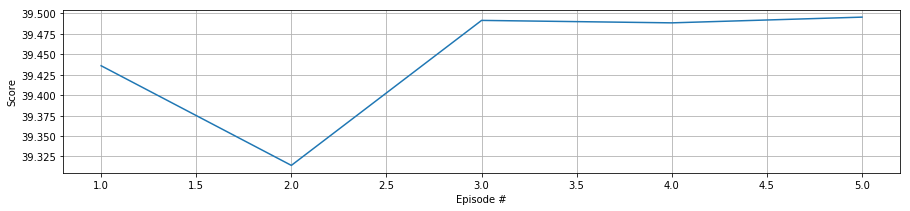

In [14]:
# Plot and print the achived scores during this episode
print("Score of 20 trained agents: {}".format(episode_score))
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
plt.plot(1+np.arange(len(episode_score)), episode_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.grid(True)
plt.show()

# Close the environment
Close the environment after the training and testing phase.

In [15]:
env.close()

<hr>